In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import missingno as msno


from plotly.offline import plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
imdb=pd.read_csv('imdb_top_1000.csv')

In [3]:
imdb.shape

(1000, 16)

In [4]:
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [6]:
imdb['Poster_Link'][1]

'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg'

In [7]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [8]:
imdb.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

<AxesSubplot:>

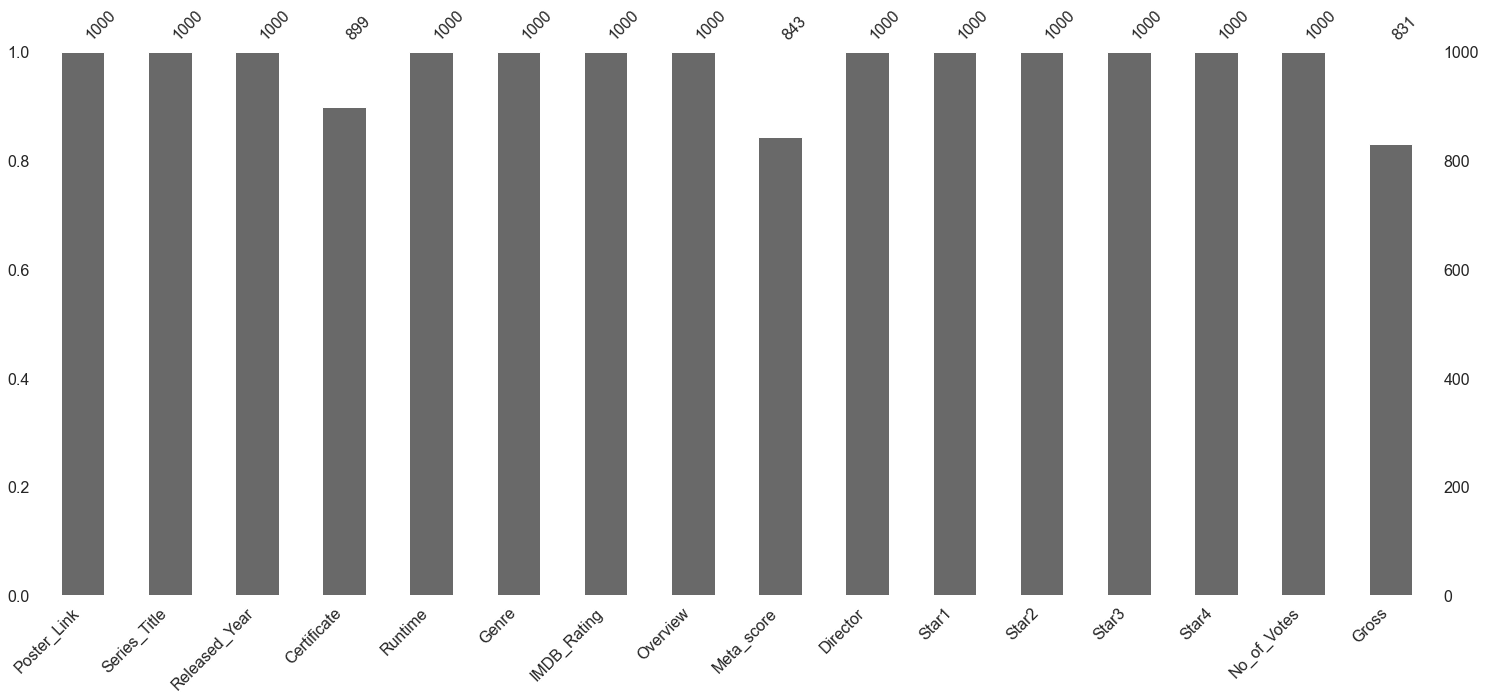

In [9]:
msno.bar(imdb)

<AxesSubplot:>

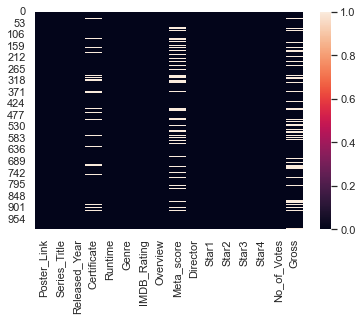

In [10]:
sns.heatmap(imdb.isnull())

In [11]:
imdb.Certificate

0           A
1           A
2          UA
3           A
4           U
        ...  
995         A
996         G
997    Passed
998       NaN
999       NaN
Name: Certificate, Length: 1000, dtype: object

In [12]:
imdb['Certificate']=imdb['Certificate'].replace(np.nan,'Unknown')


In [13]:
imdb.Certificate.isnull().sum()

0

In [14]:
imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [15]:
imdb['Meta_score']=imdb['Meta_score'].replace(np.nan,np.mean(imdb['Meta_score']))

In [16]:
imdb.Gross.unique()

array(['28,341,469', '134,966,411', '534,858,444', '57,300,000',
       '4,360,000', '377,845,905', '107,928,762', '96,898,818',
       '292,576,195', '37,030,102', '315,544,750', '330,252,182',
       '6,100,000', '342,551,365', '171,479,930', '46,836,394',
       '290,475,067', '112,000,000', nan, '53,367,844', '188,020,017',
       '7,563,397', '10,055,859', '216,540,909', '136,801,374',
       '57,598,247', '100,125,643', '130,742,922', '322,740,140',
       '269,061', '335,451,311', '13,092,000', '13,182,281', '53,089,891',
       '132,384,315', '32,572,577', '187,705,427', '6,719,864',
       '23,341,568', '19,501,238', '422,783,777', '204,843,350',
       '11,990,401', '210,609,762', '5,321,508', '32,000,000',
       '1,024,560', '163,245', '19,181', '1,661,096', '5,017,246',
       '12,391,761', '190,241,310', '858,373,000', '678,815,482',
       '209,726,015', '162,805,434', '448,139,099', '6,532,908',
       '1,223,869', '223,808,164', '11,286,112', '707,481', '25,544,867',
 

In [17]:
imdb.Runtime.unique()

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

In [18]:
###Changin datatype



In [19]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [20]:
imdb['Gross']=imdb['Gross'].str.replace(',','').astype('float')

In [21]:
imdb['Runtime']=imdb['Runtime'].apply(lambda text:text.split()[0]).astype('int')


In [22]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int32  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(11)
memory usage: 121.2+ KB


In [23]:
imdb['Gross']=imdb['Gross'].replace(np.nan,np.mean(imdb['Gross']))

In [24]:
imdb.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

### Data Visualization

In [25]:
imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [26]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int32  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(11)
memory usage: 121.2+ KB


In [27]:
fig=px.histogram(data_frame=imdb.sort_values(by='Released_Year'),x='Released_Year',color_discrete_sequence=['gold'])
fig.update_layout(font=dict(family='lato',size=18,color='white'),title=dict(text='Distribution of IMDB movies from 1920 to now',font=dict(size=30),x=.5),paper_bgcolor='black',
                                                                         
                xaxis=dict(title='year of Release'),yaxis=dict(showgrid=False))
                  

In [28]:
imdb['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [29]:
imdb.Genre.value_counts()

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

### Bar Plot

In [30]:
def bar_plot(column_name,data_frame=imdb,tribe='value_counts',by=None,limit=3,**kwargs):
    ###columns name checcking
    if type(column_name)!=str or column_name not in data_frame.columns:
        raise ValueError('Incorrect column_name or type')
    if type(limit)!=int:
        raise ValueError(f"expected integer type, got{type(limt)}")
        ###sorted data frame
    if tribe=='sort':
        ##if column not in df
        if not by or by not in data_frame.columns:
            raise ValueError('by parameter must be a cloumn from data frame! ')
        data=data_frame.sort_values(by=by,ascending=False).head(limit)
        y=data[by].values
        x=data[column_name]
        title=by
        
 ###value counts
    elif tribe=='value_counts':
        data=data_frame[column_name].value_counts().head(limit)
        x=data.index
        y=data.values
        title=column_name
        
        
    fig=px.bar(x=x,y=y,color_discrete_sequence=['gold'])
    fig.update_layout(font=dict(family='lato',size=18,color='white'),title=dict(text=f"Imdb movies - {title}",font=dict(size=30),x=.5),paper_bgcolor='black',
                       xaxis=dict(title=f"{title}",showgrid=False),yaxis=dict(title='count',showgrid=False))
                  
    fig.show() 
        
    
                         
                         

In [31]:
bar_plot('Genre',limit=7)

In [32]:
bar_plot('Genre',limit=7,tribe='sort',by='Gross')

### KDE plot

In [33]:
def add_mean_line(data=imdb,vare='Runtime',**kargs):
    if not vare: return
    mean=np.mean(data['Runtime'])
    ##currrent axis
    ax=plt.gca()
    
    ##adding line at group mean
    ax.axvline(mean,color='red',lw=3,ls='--',alpha=.7)
    
    ##Annotation 
    x_pos=0.75
    fontsize=12
    if mean<120:
        x_pos=.65
        
    ax.text(x_pos,0.7,f"{mean: .0f}",transform=ax.transAxes,color='red',fontweight='bold',fontsize=fontsize)

C:\Users\91974\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Users\91974\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.



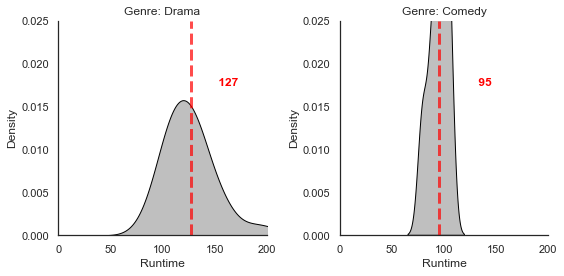

In [34]:
g=sns.FacetGrid(imdb[imdb['Genre'].isin(['Drama','Crime','Action','Comedy','Biography'])],col='Genre',height=4,
               sharex=False,sharey=False,xlim=(0,200),ylim=(0,.025))

g.map(sns.kdeplot,'Runtime',shade=True,color='black',bw=.5)
g.map_dataframe(add_mean_line)
g.set_titles(col_template='Genre: {col_name}')

### Scatter Plot

In [35]:
fig=px.scatter(imdb,x="Gross",y='No_of_Votes',hover_data=['Series_Title'],color='Genre')
fig.update_layout(font=dict(family='lato',size=18,color='white'),title=dict(text=f"Imdb movies scatter plot",font=dict(size=30),x=.5),paper_bgcolor='black',
                       xaxis=dict(title='Gross',showgrid=False),yaxis=dict(title='no. of votes',showgrid=False))

In [36]:
##### top 3 movies with highest gross



In [37]:
bar_plot('Series_Title',tribe='sort',by='Genre')

In [38]:
bar_plot('Series_Title',tribe='sort',by='IMDB_Rating')

#### Certificate

In [39]:
bar_plot('Certificate',limit=10)

In [40]:
bar_plot('Series_Title',tribe='sort',by='Meta_score',limit=7)

### Directors

In [41]:
bar_plot('Director',limit=10)

In [42]:
imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [43]:
roles=['Star1', 'Star2', 'Star3']
for star in roles:
    bar_plot(star,limit=5)

In [49]:
top_votes=imdb.sort_values(['No_of_Votes'],ascending=False)


In [50]:
top_votes

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.00000,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,2.834147e+07
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.00000,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,5.348584e+08
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.00000,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,2.925762e+08
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139,Drama,8.8,An insomniac office worker and a devil-may-car...,66.00000,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,3.703010e+07
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.00000,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,1.079288e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,https://m.media-amazon.com/images/M/MV5BZmVhN2...,Raazi,2018,UA,138,"Action, Drama, Thriller",7.8,A Kashmiri woman agrees to marry a Pakistani a...,77.97153,Meghna Gulzar,Alia Bhatt,Vicky Kaushal,Rajit Kapoor,Shishir Sharma,25344,6.803475e+07
718,https://m.media-amazon.com/images/M/MV5BYmMxZT...,Scarface: The Shame of the Nation,1932,PG,93,"Action, Crime, Drama",7.8,An ambitious and nearly insane violent gangste...,87.00000,Howard Hawks,Richard Rosson,Paul Muni,Ann Dvorak,Karen Morley,25312,6.803475e+07
694,https://m.media-amazon.com/images/M/MV5BYjhhMD...,La planÃ¨te sauvage,1973,U,72,"Animation, Sci-Fi",7.8,"On a faraway planet where blue giants rule, op...",73.00000,RenÃ© Laloux,Barry Bostwick,Jennifer Drake,Eric Baugin,Jean Topart,25229,1.938170e+05
721,https://m.media-amazon.com/images/M/MV5BNjRhYz...,God's Own Country,2017,Unknown,104,"Drama, Romance",7.7,Spring. Yorkshire. Young farmer Johnny Saxby n...,85.00000,Francis Lee,Josh O'Connor,Alec Secareanu,Gemma Jones,Ian Hart,25198,3.356090e+05


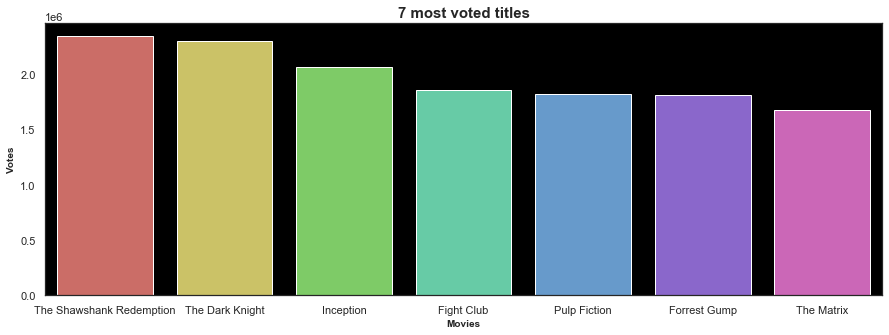

In [46]:
fig,ax=plt.subplots(figsize=(15,5))
ax.set(facecolor='Black')
sns.barplot(x=top_votes['Series_Title'][:7],y=top_votes['No_of_Votes'][:7],palette='hls')
plt.title('7 most voted titles',fontweight='bold',fontsize=15)
plt.xlabel('Movies',fontsize=10,fontweight='bold')
plt.ylabel('Votes',fontsize=10,fontweight='bold')
plt.show()

In [51]:
top_gross=imdb.sort_values(['Gross'],ascending=False)


In [52]:
top_gross

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.00000,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.00000,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.00000,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0
60,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.00000,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
652,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997,UA,194,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.00000,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,https://m.media-amazon.com/images/M/MV5BMTgzMT...,Ajeossi,2010,R,119,"Action, Crime, Drama",7.8,A quiet pawnshop keeper with a violent past ta...,77.97153,Jeong-beom Lee,Won Bin,Sae-ron Kim,Tae-hoon Kim,Hee-won Kim,62848,6460.0
926,https://m.media-amazon.com/images/M/MV5BMTI5Mz...,Dead Man's Shoes,2004,Unknown,90,"Crime, Drama, Thriller",7.6,A disaffected soldier returns to his hometown ...,52.00000,Shane Meadows,Paddy Considine,Gary Stretch,Toby Kebbell,Stuart Wolfenden,49728,6013.0
624,https://m.media-amazon.com/images/M/MV5BMTg4OD...,Mr. Nobody,2009,R,141,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,63.00000,Jaco Van Dormael,Jared Leto,Sarah Polley,Diane Kruger,Linh Dan Pham,216421,3600.0
390,https://m.media-amazon.com/images/M/MV5BMTk2Mj...,Knockin' on Heaven's Door,1997,Unknown,87,"Action, Crime, Comedy",8.0,Two terminally ill patients escape from a hosp...,77.97153,Thomas Jahn,Til Schweiger,Jan Josef Liefers,Thierry van Werveke,Moritz Bleibtreu,27721,3296.0


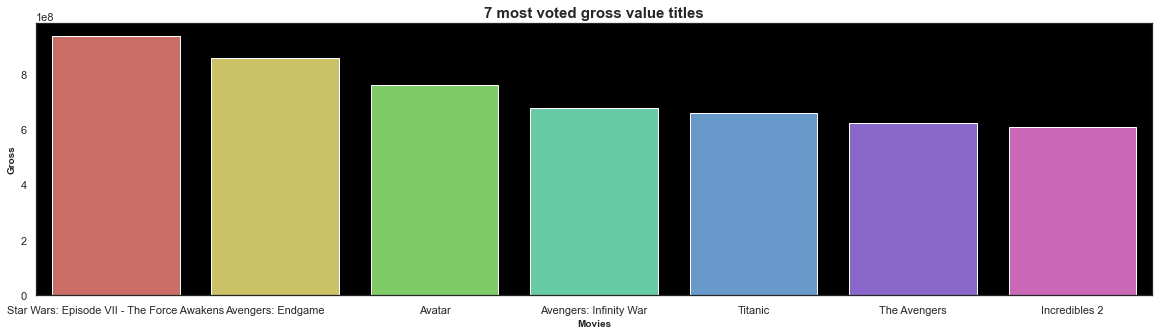

In [58]:
fig,ax=plt.subplots(figsize=(20,5))
ax.set(facecolor='Black')
sns.barplot(x=top_gross['Series_Title'][:7],y=top_gross['Gross'][:7],palette='hls')
plt.title('7 most voted gross value titles',fontweight='bold',fontsize=15)
plt.xlabel('Movies',fontsize=10,fontweight='bold')
plt.ylabel('Gross',fontsize=10,fontweight='bold')
plt.show()

In [59]:
top_7_rated_dir=imdb.sort_values(['Gross'],ascending=False).reset_index().drop('index',axis=1)


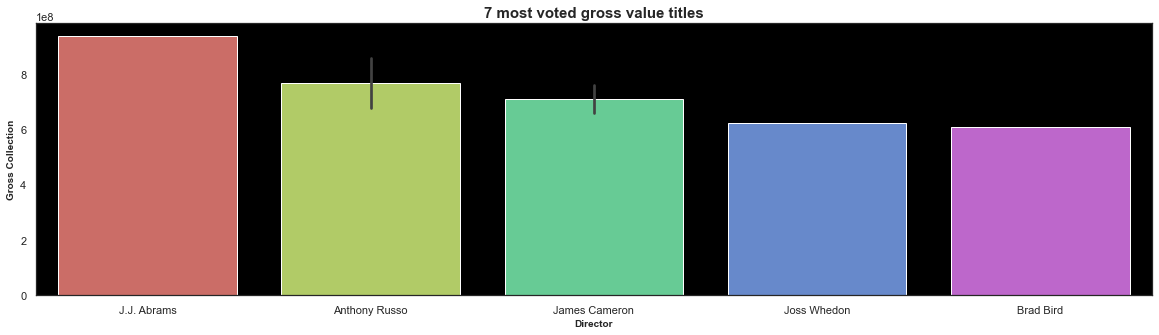

In [60]:
fig,ax=plt.subplots(figsize=(20,5))
ax.set(facecolor='Black')
sns.barplot(x=top_7_rated_dir['Director'][:7],y=top_7_rated_dir['Gross'][:7],palette='hls')
plt.title('7 most voted gross value titles',fontweight='bold',fontsize=15)
plt.xlabel('Director',fontsize=10,fontweight='bold')
plt.ylabel('Gross Collection',fontsize=10,fontweight='bold')
plt.show()